In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_rpp_with_mnt_2048_generic_prompt.csv"
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(
    model_name,
    adapter_name_or_path,
    load_in_4bit,
    data_path,
    results_path,
    use_english_datasets,
    max_new_tokens,
)

microsoft/Phi-3.5-mini-instruct None False datasets/mac/mac.tsv results/mac-results_rpp_with_mnt_2048_generic_prompt.csv False 2048


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils_v2 import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions_v2d.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils_v2.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Encoder model frozen.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 28 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00              1130 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02              1131 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04              1130 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06              1131 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08              1130 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-14

/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


In [6]:
result_columns = [col for col in df.columns[2:].to_list() if "Qwen" not in col]
result_columns.sort()
result_columns

['internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.00',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.02',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.04',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.06',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.08',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.10',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.00',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.02',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.04',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.06',
 'shenzhi-wang/Llama3.1-70B-Ch

In [7]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.00',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.02',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.04',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.06',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.08',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.10',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.00',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.02',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.04',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.06',
  'shenzhi-wan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 26 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00              1130 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02              1131 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04              1130 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06              1131 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08              1130 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-14

In [9]:
metrics_path = results_path.replace(".csv", "_metrics.csv")
metrics_df = pd.read_csv(metrics_path) if os.path.exists(metrics_path) else None
metrics_df.info() if metrics_df is not None else None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   model                     24 non-null     object 
 1   rpp                       24 non-null     float64
 2   comet                     24 non-null     float64
 3   meteor                    24 non-null     float64
 4   spbleu                    24 non-null     float64
 5   bleu_1                    24 non-null     float64
 6   rouge_l                   24 non-null     float64
 7   ews_score                 24 non-null     float64
 8   repetition_score          24 non-null     float64
 9   total_repetitions         24 non-null     float64
 10  nrr                       24 non-null     float64
 11  rap                       24 non-null     float64
 12  translation_completeness  24 non-null     float64
 13  num_max_output_tokens     24 non-null     int64  
dtypes: float64(1

In [10]:
%%time

variant = "rpp"
metrics_df = get_metrics(
    df,
    max_output_tokens=max_new_tokens,
    variant=variant,
    existing_metrics_df=metrics_df,
)
metrics_df

['internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat']


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


['internlm/internlm2_5-7b-chat/checkpoint-140', '1.00']
Using existing metrics for internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00
internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00: {'model': 'internlm/internlm2_5-7b-chat', 'rpp': 1.0, 'comet': 0.7357995069773978, 'meteor': 0.4297612514398102, 'spbleu': 15.060226683930628, 'bleu_1': 0.1506022668393063, 'rouge_l': 0.4097577795330234, 'ews_score': 0.057369814651368, 'repetition_score': 11.715798764342454, 'total_repetitions': 11.773168578993822, 'nrr': 0.904585121602289, 'rap': 0.668838612578822, 'translation_completeness': 1.0, 'num_max_output_tokens': 2}
['internlm/internlm2_5-7b-chat/checkpoint-140', '1.02']
Using existing metrics for internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02
internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02: {'model': 'internlm/internlm2_5-7b-chat', 'rpp': 1.02, 'comet': 0.7377187550620283, 'meteor': 0.4246676977198055, 'spbleu': 14.728605282752795, 'bleu_1': 0.147286052827528, 'rouge_l': 0.4063

model   rpp     comet    meteor  \
0                internlm/internlm2_5-7b-chat  1.00  0.735800  0.429761   
1                internlm/internlm2_5-7b-chat  1.02  0.737719  0.424668   
2                internlm/internlm2_5-7b-chat  1.04  0.737116  0.417335   
3                internlm/internlm2_5-7b-chat  1.06  0.733860  0.399761   
4                internlm/internlm2_5-7b-chat  1.08  0.731823  0.388161   
5                internlm/internlm2_5-7b-chat  1.10  0.728865  0.378418   
6             microsoft/Phi-3.5-mini-instruct  1.00  0.710605  0.378893   
7             microsoft/Phi-3.5-mini-instruct  1.02  0.715098  0.374105   
8             microsoft/Phi-3.5-mini-instruct  1.04  0.707464  0.353870   
9             microsoft/Phi-3.5-mini-instruct  1.06  0.696230  0.325285   
10            microsoft/Phi-3.5-mini-instruct  1.08  0.682341  0.301599   
11            microsoft/Phi-3.5-mini-instruct  1.10  0.671785  0.288573   
12     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.739080  0.449010   
13     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.743019  0.451491   
14     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.743220  0.451750   
15     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.743082  0.448415   
16     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.743594  0.440773   
17     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.742706  0.435894   
18  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.722226  0.403990   
19  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.723644  0.405110   
20  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.723881  0.403946   
21  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.725263  0.401280   
22  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.726117  0.398740   
23  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.726463  0.396486   

       spbleu    bleu_1   rouge_l  ews_score  repetition_score  \
0   15.060227  0.150602  0.409758   0.049426          9.235658   
1   14.728605  0.147286  0.406325   0.069726          5.356575   
2   13.846404  0.138464  0.398812   0.068844          5.315093   
3   12.213375  0.122134  0.384137   0.058252          5.275375   
4   11.369736  0.113697  0.372963   0.067079          5.283319   
5   10.377989  0.103780  0.361842   0.052074          5.288614   
6    9.700329  0.097003  0.355613   5.390997         12.997352   
7    9.910634  0.099106  0.345316   3.586055          7.001765   
8    9.197213  0.091972  0.322582   0.051192          0.055605   
9    6.967166  0.069672  0.294876   0.035305          0.067961   
10   5.452744  0.054527  0.272639   0.076787          0.047661   
11   4.751039  0.047510  0.260428   0.080318          0.023831   
12   6.701340  0.067013  0.419618   0.367167        139.809356   
13   8.545955  0.085460  0.421494   1.003530         67.003530   
14  10.080425  0.100804  0.420097   0.010591         35.197705   
15  10.374705  0.103747  0.416029   1.800530         26.880847   
16  10.930453  0.109305  0.411306   0.092674         12.007944   
17  11.381344  0.113813  0.406298   0.017652         11.914387   
18  13.461180  0.134612  0.381996   0.057370          5.873786   
19  13.185379  0.131854  0.382462   0.062665          5.840247   
20  13.314773  0.133148  0.381374   0.057370          5.845543   
21  13.199243  0.131992  0.379829   0.062665          5.847308   
22  12.656486  0.126565  0.376975   0.056487          5.820830   
23  12.284962  0.122850  0.374456   0.049426          0.092674   

    total_repetitions       nrr       rap  translation_completeness  \
0            9.285084  0.924750  0.682462                  1.000000   
1            5.421006  0.953790  0.704404                  1.000000   
2            5.383054  0.954989  0.704673                  1.000000   
3            5.332745  0.956176  0.702394                  1.000000   
4            5.345102  0.957036  0.701047                  1.000000   
5            5.340688  0.957824  0.698763                  1.000000   
6           18.3

In [11]:
metrics_df.to_csv(metrics_path, index=False)
metrics_df.describe()

comet     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000   
mean    0.724625   0.397805  10.820488   0.108205   0.373218   0.551008   
std     0.019234   0.044872   2.822538   0.028225   0.045354   1.303636   
min     0.671785   0.288573   4.751039   0.047510   0.260428   0.010591   
25%     0.720444   0.378774   9.574550   0.095745   0.360285   0.051853   
50%     0.727664   0.402613  11.150095   0.111501   0.381685   0.062665   
75%     0.738059   0.431294  13.188845   0.131888   0.407183   0.083407   
max     0.743594   0.451750  15.060227   0.150602   0.421494   5.390997   

       repetition_score  total_repetitions        nrr        rap  \
count         24.000000          24.000000  24.000000  24.000000   
mean          15.753457          16.291703   0.916109   0.668972   
std           30.175140          30.285499   0.107908   0.058472   
min            0.023831           0.097970   0.516442   0.455706   
25%            5.281333           5.338703   0.923150   0.668235   
50%            5.842895           5.887026   0.949123   0.688630   
75%           11.937776          11.947264   0.957233   0.699334   
max          139.809356         140.157988   0.999281   0.725629   

       translation_completeness  num_max_output_tokens  
count                 24.000000              24.000000  
mean                   0.999963               2.250000  
std                    0.000180               3.206651  
min                    0.999117               0.000000  
25%                    1.000000               1.000000  
50%                    1.000000               1.000000  
75%                    1.000000               3.000000  
max                    1.000000              15.000000

In [12]:
models = metrics_df["model"].unique()
models

array(['internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [13]:
# list of markers for plotting
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
markers = {model: marker for model, marker in zip(models, markers)}

In [14]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [15]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    columns,
    titles,
    log_scales=[False, False],
    sync_y_axis=False,
):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax = twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Repetition Penalty Parameter (RPP)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(
        zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]]
    )
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.575 if len(columns) > 1 else -0.35),
    )

    plt.show()

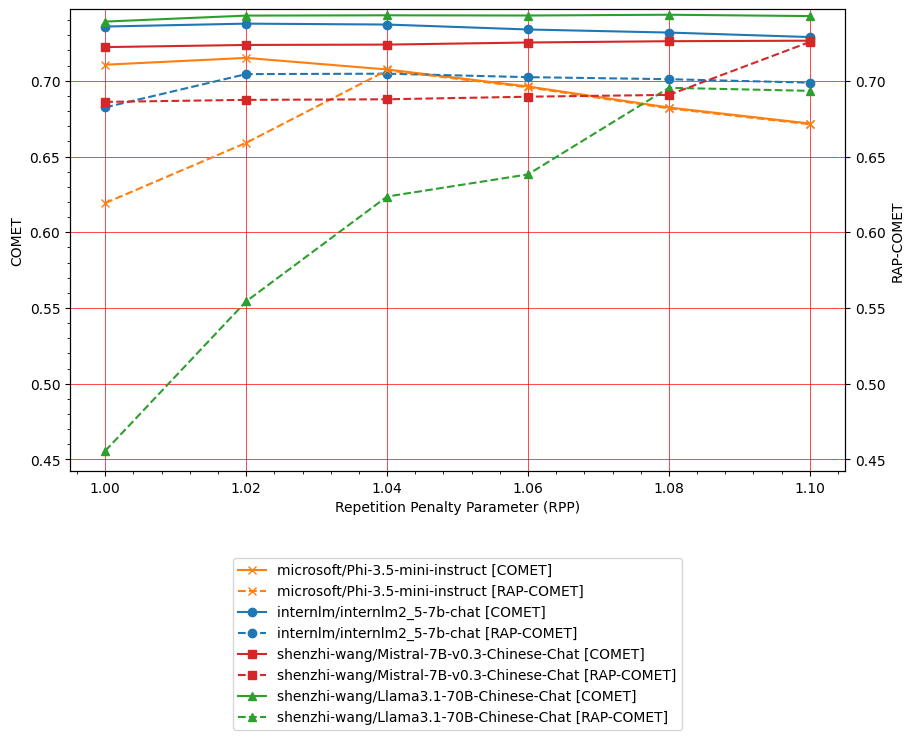

In [16]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "rap"],
    ["COMET", "RAP-COMET"],
    sync_y_axis=True,
)

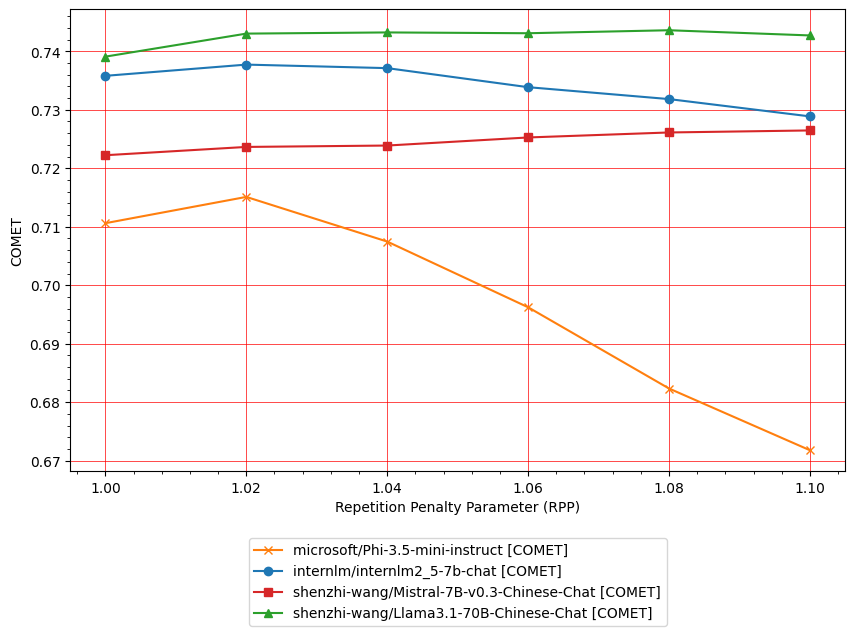

In [17]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet"],
    ["COMET"],
)

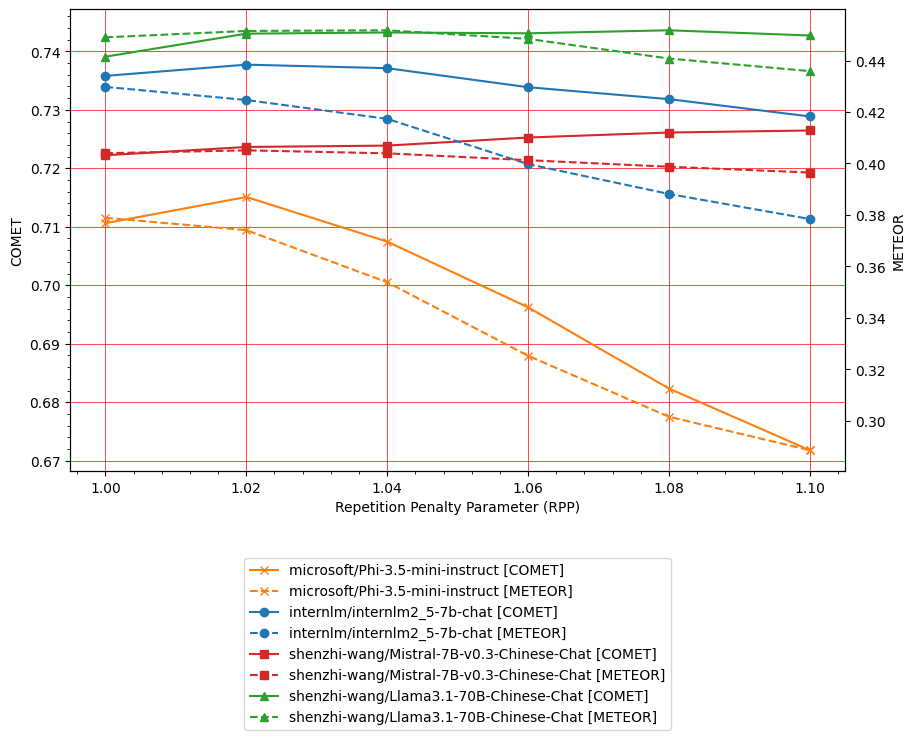

In [18]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "meteor"],
    ["COMET", "METEOR"],
)

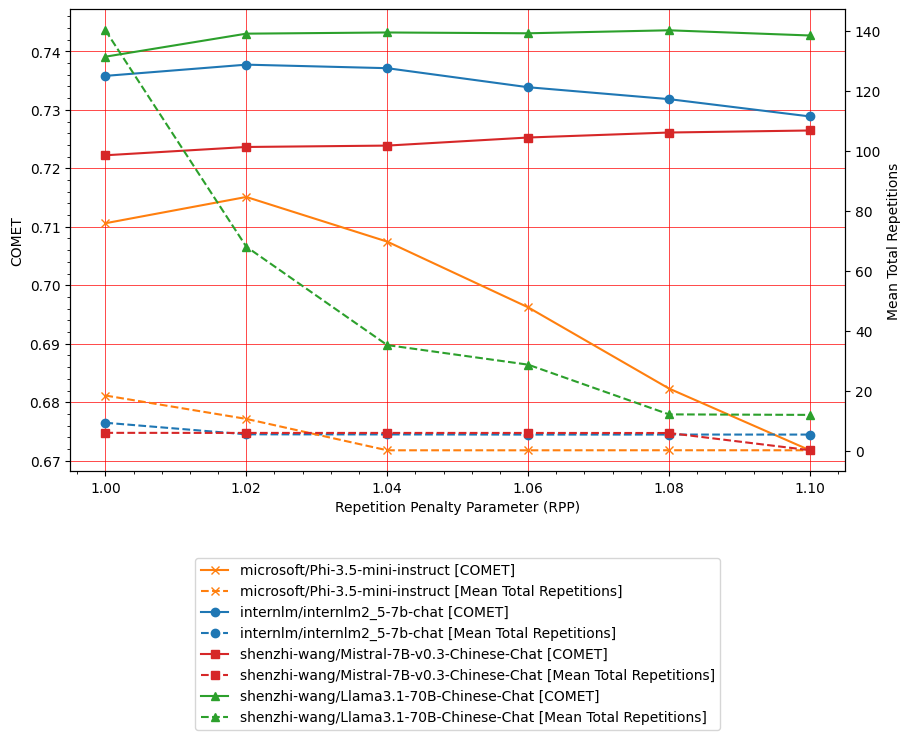

In [19]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "total_repetitions"],
    ["COMET", "Mean Total Repetitions"],
)

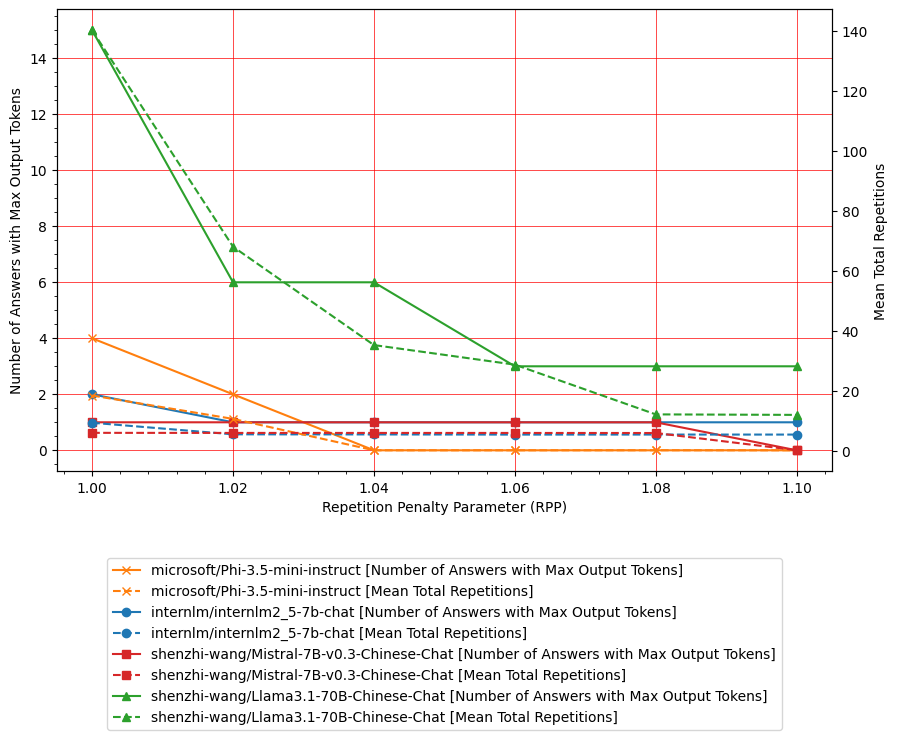

In [20]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_max_output_tokens", "total_repetitions"],
    ["Number of Answers with Max Output Tokens", "Mean Total Repetitions"],
)

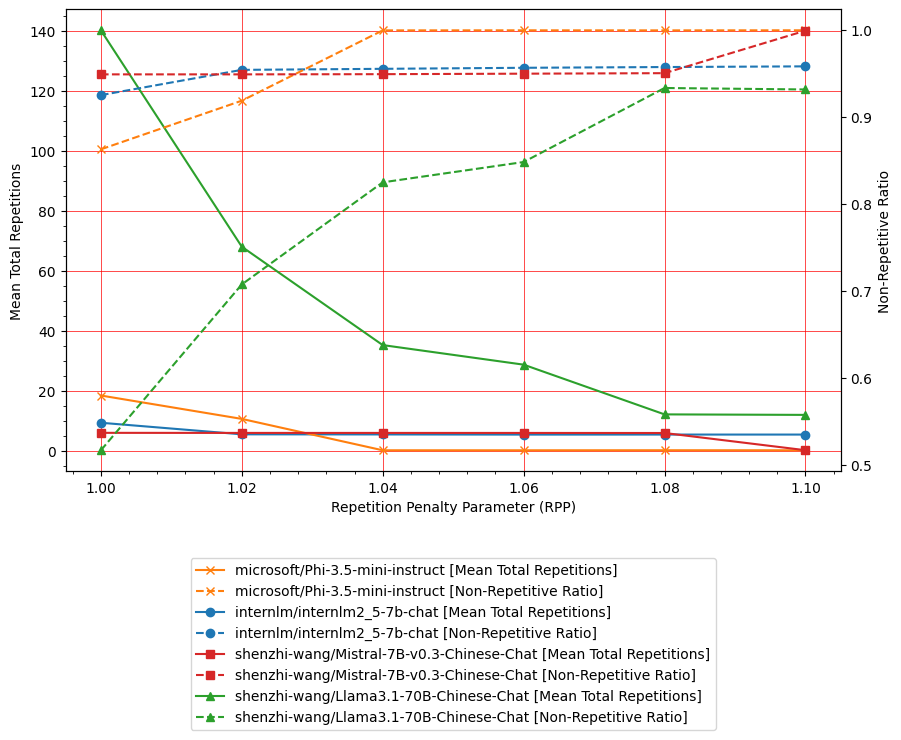

In [21]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "nrr"],
    ["Mean Total Repetitions", "Non-Repetitive Ratio"],
)

In [ ]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(
        df, col, repetition_threshold=50, max_new_tokens=max_new_tokens
    )

### Analyzing: internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00
*** Found 3 rows with total_repetitions > 50 for internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00
短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短短长长、短短短长长、长长短短短，这是1108：21：37。
short-long-long-long-long, short-long-long-long-long, long-long-long-long-long, long-long-long-short-short, long-long-long-short-short-short, short-short-long-long-long, short-long-long-long-long, long-long-long-short-short-short, short-short-short-long-long, long-long-short-short-short. That's 1108:21:37, Wang thought.
 SHORT LONG SHORT LONG SHORT LONG SHORT SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG SHORT SHORT SHORT LONG LONG 